In [1]:
#Required imports for the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
     

In [2]:
# Importing Customer Churn Analysis dataset Csv file using pandas

In [3]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [5]:
print('No. of Rows:', df.shape[0])
print('No. of columns:',df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

No. of Rows: 100000
No. of columns: 9


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [6]:
#Information after optimization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [7]:
#All columns in the data set
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [8]:
#splitting into Numerical and Categorical
Categorical = ['Name','Gender', 'Location']
Numerical = ['CustomerID','Age','Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB','Churn']

# Statistical Analysis

**Before Going for Statistical exploration of data, first check integrity of data & Missing value**


## Data Integrity Check

**Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.**

In [9]:
df.duplicated().sum() # This will check the duplicate data for all columns.

0

No duplicate records

In [10]:
df.shape

(100000, 9)

In [11]:
# count number of rows with missing values
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

No missing values found in the dataset

## Outlier Identification

**Skewness :**

* Skewness is computed for each row or each column of the data present in the DataFrame object.

* Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

**Important Notes:**

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

* If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed

In [12]:
# Calculate skewness
skew = df.skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'skew': skew})
print(skew_df.head(10))

                                skew
Churn                       0.008840
Total_Usage_GB              0.007113
CustomerID                  0.000000
Monthly_Bill               -0.000326
Subscription_Length_Months -0.001655
Age                        -0.002689


In [13]:
skew_df[(skew_df['skew']>=1) |(skew_df['skew']<=-1) ].index

Index([], dtype='object')

Our data is not skewed

### Kurtosis

**Describe:**

* Kurtosis is one of the two measures that quantify shape of a distribution. kutosis determine the volume of the outlier

* Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers.

* Kurtosis describes the peakedness of the distribution.

* If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.

* A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.

* A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

* Kurtosis is sometimes reported as “excess kurtosis.” Excess kurtosis is determined by subtracting 3 from the kurtosis. This makes the normal distribution kurtosis equal 0.

In [14]:
# Calculate Kurtosis
kurtosis= pd.DataFrame(df.kurtosis(),columns=['Kurtosis'])
print(kurtosis.head(8))

                            Kurtosis
CustomerID                 -1.200000
Age                        -1.198180
Subscription_Length_Months -1.205610
Monthly_Bill               -1.204568
Total_Usage_GB             -1.201278
Churn                      -1.999962


In [15]:
kurtosis[(kurtosis['Kurtosis']>=3) |(kurtosis['Kurtosis']<=-3) ].index
     

Index([], dtype='object')

### Variance :

Features with low variance should be eliminated

In [16]:
#Calculate Variance
var= df.var().sort_values(ascending =True )
var_df= pd.DataFrame({'var':var})
print(var_df.head(10))

                                     var
Churn                       2.499976e-01
Subscription_Length_Months  4.797586e+01
Age                         2.334870e+02
Monthly_Bill                4.092811e+02
Total_Usage_GB              1.702061e+04
CustomerID                  8.333417e+08


### Quantile Data:

In [17]:
# Calcualte IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID                    49999.5
Age                              26.0
Subscription_Length_Months       13.0
Monthly_Bill                     35.1
Total_Usage_GB                  226.0
Churn                             1.0
dtype: float64


In [18]:
# Descriptive stat values of the dataset
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'])   

,count,mean,std,min,25%,50%,75%,max
CustomerID,100000.000000,50000.500000,28867.657797,1.000000,25000.750000,50000.500000,75000.250000,100000.000000
Age,100000.000000,44.027020,15.280283,18.000000,31.000000,44.000000,57.000000,70.000000
Subscription_Length_Months,100000.000000,12.490100,6.926461,1.000000,6.000000,12.000000,19.000000,24.000000
Monthly_Bill,100000.000000,65.053197,20.230696,30.000000,47.540000,65.010000,82.640000,100.000000
Total_Usage_GB,100000.000000,274.393650,130.463063,50.000000,161.000000,274.000000,387.000000,500.000000
Churn,100000.000000,0.497790,0.499998,0.000000,0.000000,0.000000,1.000000,1.000000


In [19]:
df[Categorical].describe().T

,count,unique,top,freq
Name,100000,100000,Customer_1,1
Gender,100000,2,Female,50216
Location,100000,5,Houston,20157


**The best way to avoid customer churn is to know your customers, and the best way to know your customer is through historical and new customer data.**

**Start with Enlisting Value counts & Sub-categories of different categorial features available**

In [20]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

Name
Customer_1         1
Customer_66651     1
Customer_66673     1
Customer_66672     1
Customer_66671     1
                  ..
Customer_33332     1
Customer_33331     1
Customer_33330     1
Customer_33329     1
Customer_100000    1
Name: Name, Length: 100000, dtype: int64
Gender
Female    50216
Male      49784
Name: Gender, dtype: int64
Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64


In [21]:
df['Churn'].value_counts()

0.0    50221
1.0    49779
Name: Churn, dtype: int64

In [22]:
# Split dependent and independent variables
target= "Churn"
X = df.drop(target, axis='columns')# axis=1
y = df[target].to_numpy()
     

In [23]:
# Feature classification
cat_columns = X.select_dtypes(exclude=[np.number]).columns
num_columns = X.select_dtypes(include=[np.number]).columns
     

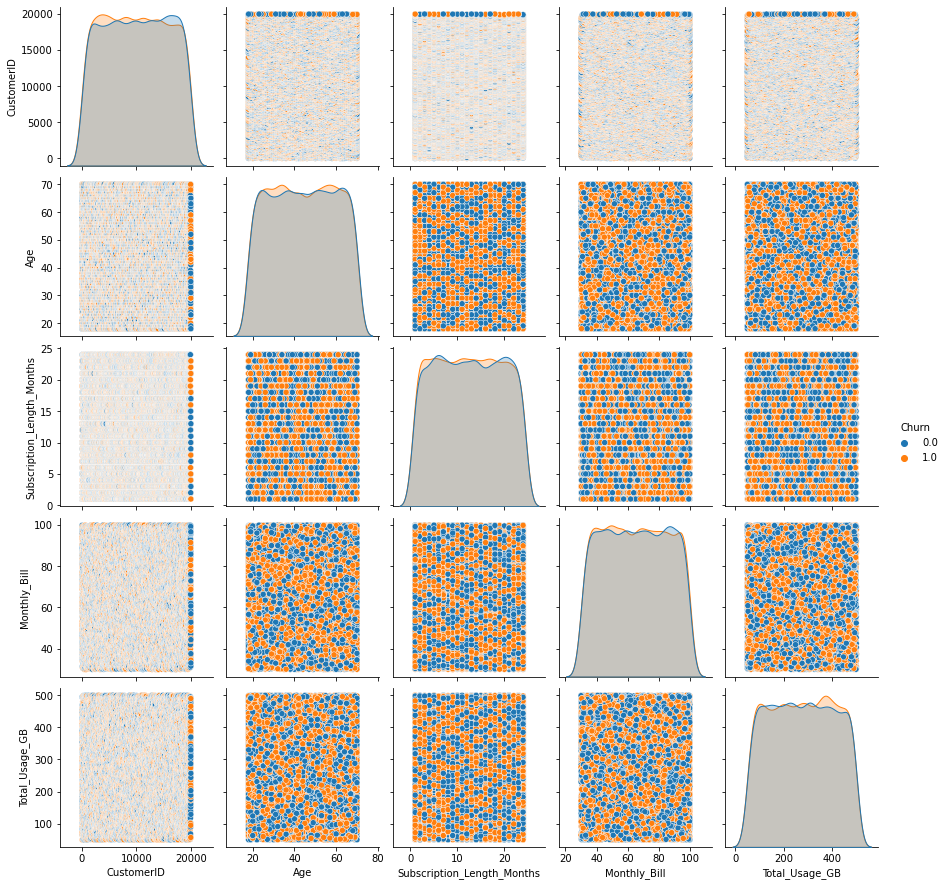

In [24]:
sns.pairplot(df.iloc[0:20000], hue= 'Churn')

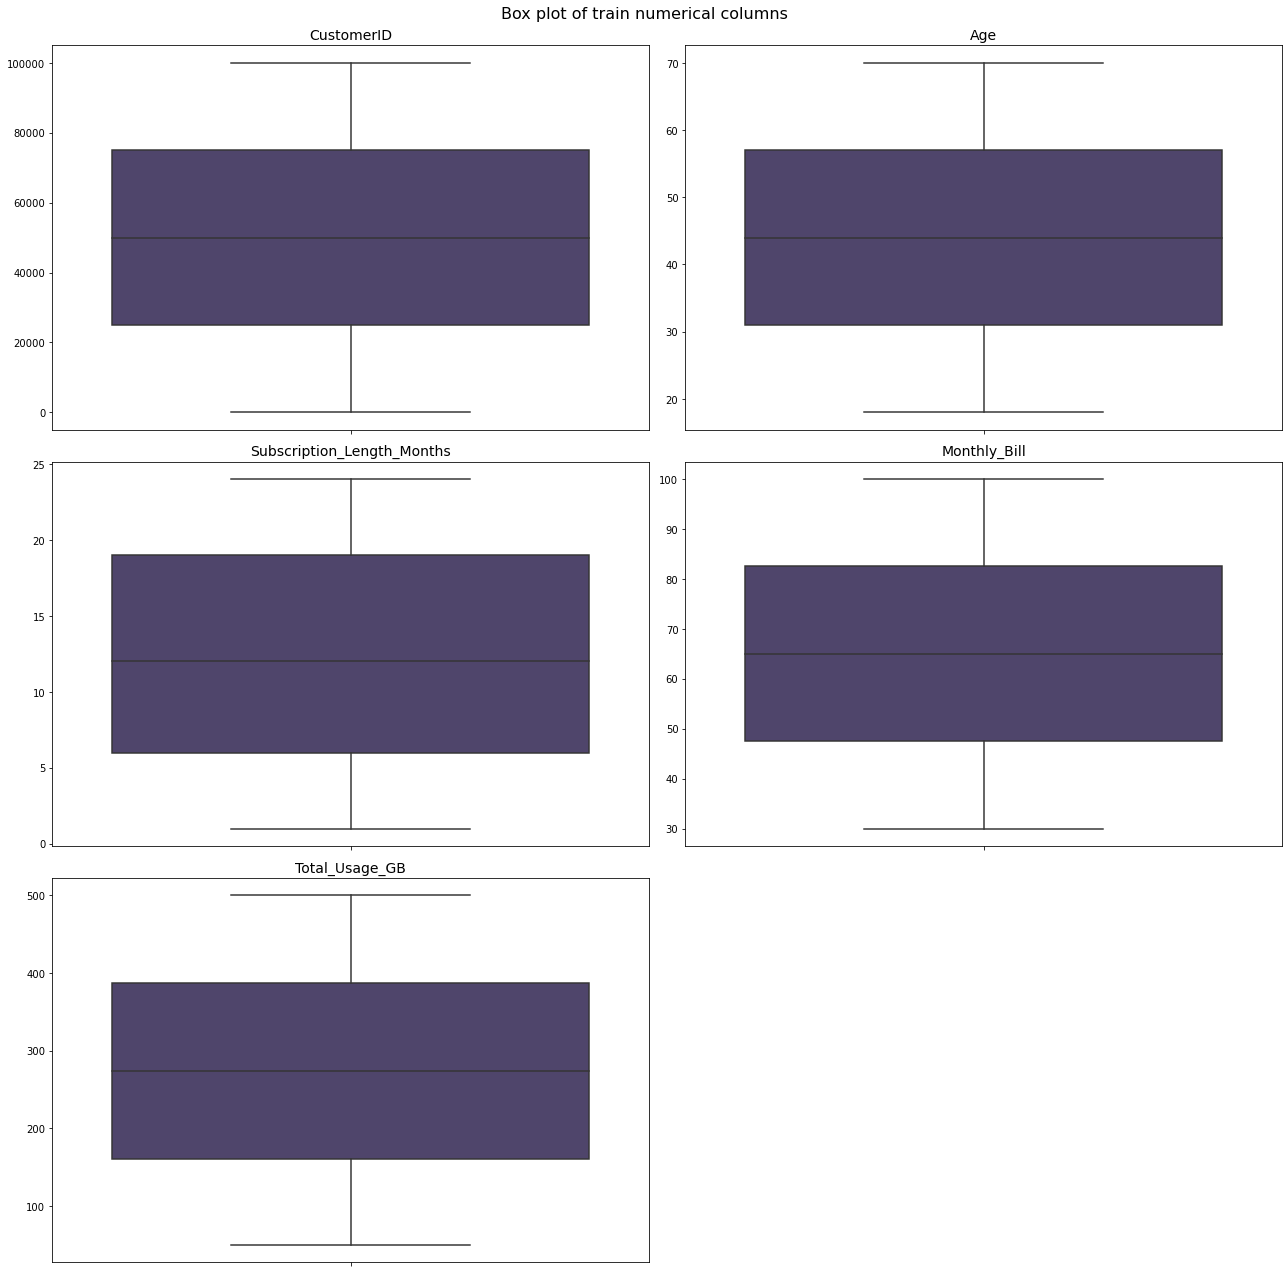

In [25]:
# Box plot for all numerical features
v0 = sns.color_palette(palette='viridis').as_hex()[0]

fig, axes = plt.subplots(3, 2, figsize=(18,18))  # 3 rows, 2 columns
fig.suptitle('Box plot of train numerical columns', fontsize=16)

for i, col in enumerate(num_columns):
    row = i // 2  # integer division gives us the row number
    col = i % 2   # remainder gives us the column number
    sns.boxplot(data=X[num_columns[i]], color=v0, saturation=.5, ax=axes[row, col])
    axes[row, col].set_title(num_columns[i], fontsize=14)
    axes[row, col].set_xticklabels(labels=[], fontsize=14)  # remove x labels for clarity

# Remove any extra subplots
for i in range(len(num_columns), 6):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
     

     

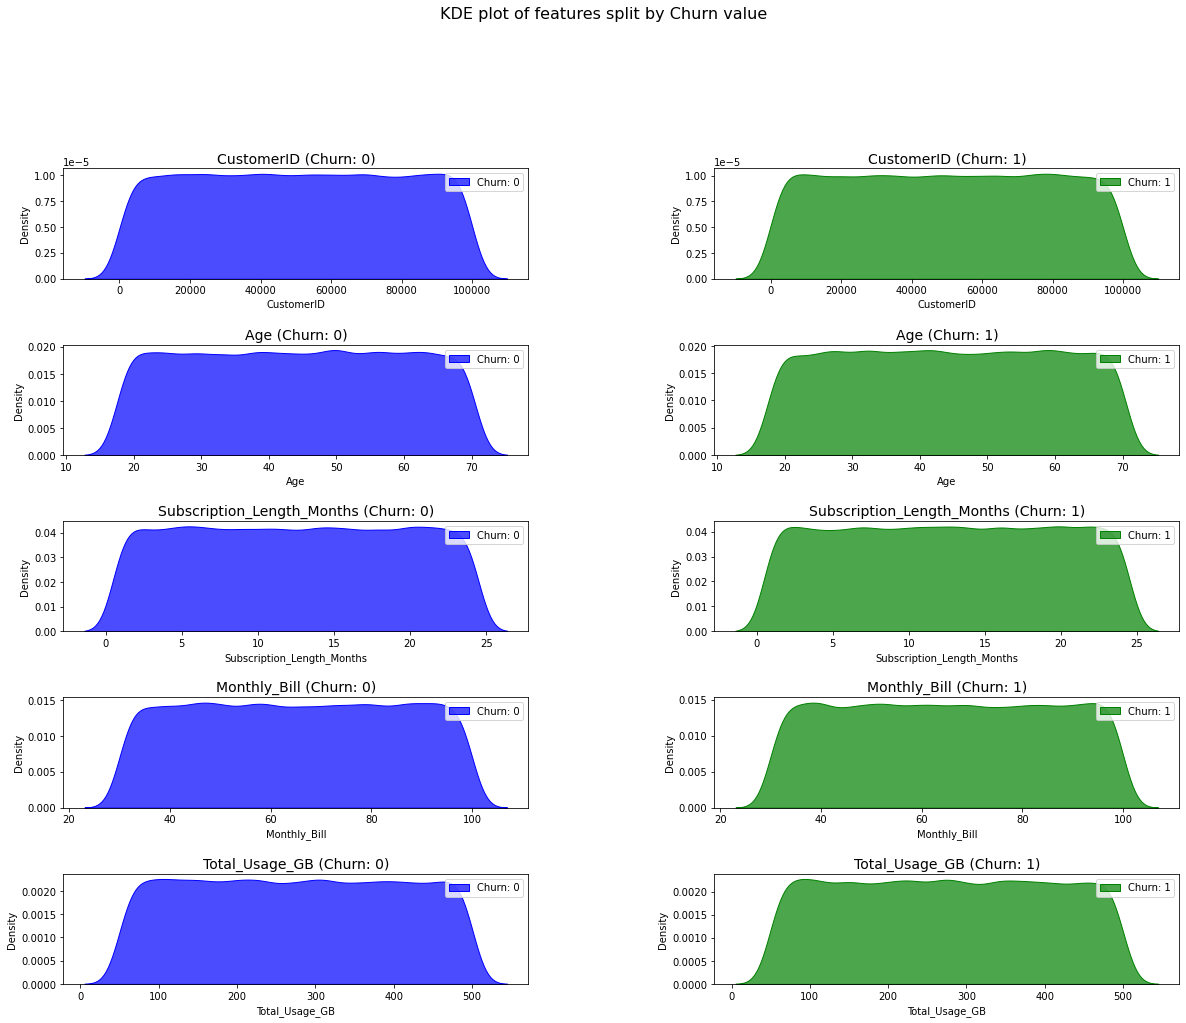

In [26]:
# KDE plot of target with numerical features in the dataset
fig = plt.figure(figsize=(20,15))
grid = gridspec.GridSpec(len(num_columns),2,figure=fig,hspace=.6,wspace=.4)

for n, col in enumerate(num_columns):
    # Plotting distribution for Churn = 0
    ax = fig.add_subplot(grid[n, 0])
    sns.kdeplot(data=df[df['Churn'] == 0], x=col, ax=ax, color="blue", label="Churn: 0", alpha=.7,fill=True)
    ax.set_title(f"{col} (Churn: 0)", fontsize=14)
    ax.set_ylabel('Density')
    ax.legend()

    # Plotting distribution for Churn = 1
    ax = fig.add_subplot(grid[n, 1])
    sns.kdeplot(data=df[df['Churn'] == 1], x=col, ax=ax, color="green", label="Churn: 1", alpha=.7,fill=True)
    ax.set_title(f"{col} (Churn: 1)", fontsize=14)
    ax.set_ylabel('Density')
    ax.legend()

fig.suptitle('KDE plot of features split by Churn value', fontsize=16, y=1.03);
plt.show()

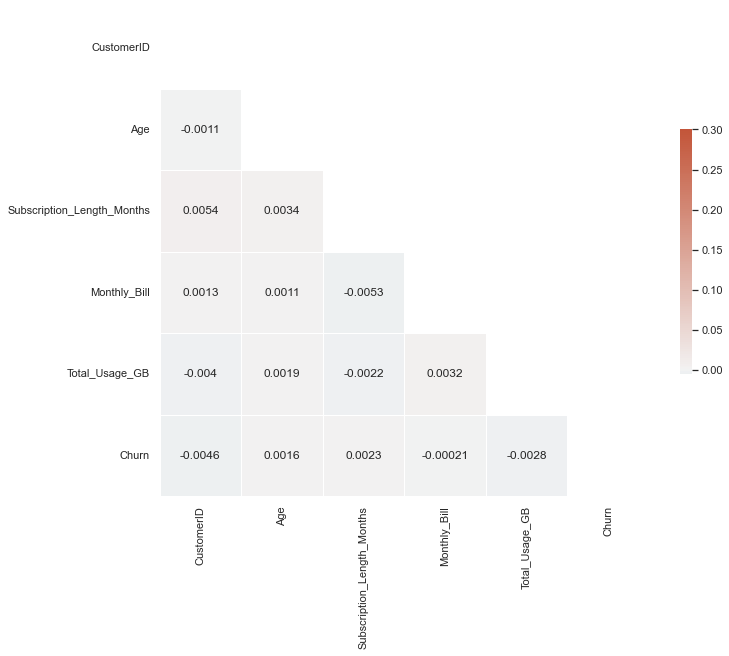

In [27]:
# Set a theme for seaborn
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()
     


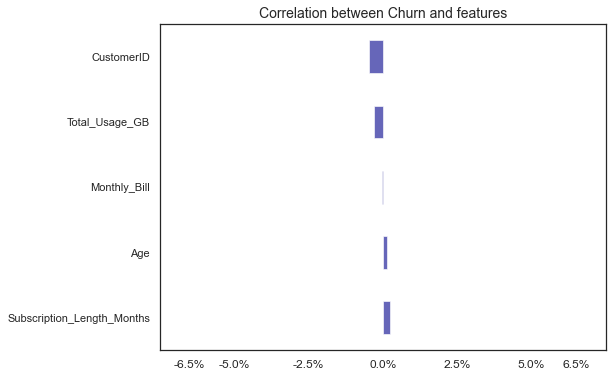

In [28]:
# Calculate correlation with the target column 'Churn'
correlation_with_target = df.corr()['Churn'].sort_values(ascending=False)
correlation_with_target.drop('Churn', inplace=True)  # remove the Churn-Churn self correlation

correlation_with_target.plot.barh(figsize=(8,6), alpha=0.6, color='darkblue')
plt.xlim(-0.075, 0.075)  # Adjusting limits for smaller correlation values
plt.xticks([-0.065, -0.05 , -0.025,  0.0,  0.025,  0.05,  0.065],
           [str(round(100*i, 2))+'%' for i in [-0.065, -0.05 , -0.025,  0.0,  0.025,  0.05,  0.065]], fontsize=12)
plt.title('Correlation between Churn and features', fontsize=14)
plt.show()
     

In [29]:
# Correlation
df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [30]:
# Total no of Churned and Not Churned values
df.Churn.value_counts()

0.0    50221
1.0    49779
Name: Churn, dtype: int64

**Summary:**

From the Above undersanding we observed that the entire data set is balanced with respect to target feature and also each feature is uniformly distributed. And also all the features are independent with respect to each other.The correlation with the target variable also very less for all the features

## Data preprocessing

Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling.

In [31]:
# Dropping the unrelated columns from the dataset
X.drop(['CustomerID','Name'],axis=1,inplace=True)

**Feature Elimination:**

When it comes to using customer_id and customer_name for predictions, here are some considerations:

**Irrelevant for Model:** In most cases, customer-specific identifiers like customer_id and customer_name don't contain any predictive power. For a binary classification task, unless the IDs or names themselves have some specific relevance to the outcome (which is highly unlikely), they won't be useful as predictors.

**Risk of Overfitting:** Including such unique identifiers can sometimes lead to overfitting. The model might "memorize" specific IDs in relation to outcomes in the training set, but this won't generalize well to unseen data.

**Data Leakage:** If there's any pattern in which IDs were assigned (e.g., customers who joined earlier have lower IDs), and the outcome variable is in some way related to this pattern (e.g., older customers are more likely to churn), then including customer_id could introduce data leakage.

**Space and Computational Efficiency:** Removing irrelevant columns helps in reducing the dimensionality, which in turn can lead to faster training times and can help models perform better.

**Interpretability:** Models become more interpretable when they are built on relevant features. Including identifiers may create noise and reduce the clarity of understanding which features are driving predictions.

## Data Split

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder,OrdinalEncoder

In [33]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0,stratify=y )


In [34]:
# Columns to be one-hot encoded
categorical_features = ['Gender', 'Location']

# Columns to be standardized (scaled)
numeric_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']


In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

**Feature Scaling:**

When the data is uniformly distributed, the choice of scaling technique for numerical variables often depends on the specific algorithms you intend to use, rather than the distribution of the data. However, there are some considerations to keep in mind:

**Min-Max Scaling:** Rescales data to a [0, 1] range. It retains the distribution's uniform nature, but outliers can distort this scale.

**StandardScaler:** Centers data around zero, scaling by standard deviation. Uniform distribution remains intact, but it's also outlier-sensitive.

**RobustScaler:** Primarily for outlier-heavy datasets; uniformly distributed data sees limited benefits.

**Log Transformation and Box-Cox:** Better suited for skewed datasets.

So, the best approach is

For distance-sensitive algorithms like K-NN or SVM,
both Min-Max and StandardScaler are viable. The preference hinges on whether a [0,1] range or a zero-centered scale is desired.

For magnitude-focused algorithms (like certain linear regressions), any uniform scaling method will suffice.
Tree-based models, like decision trees or random forests, aren't typically scale-dependent, making scaling optional.
Feature Encoding:

**Label/Ordinal Encoding:** Gender, typically having two categories like Male and Female, can easily be label-encoded. This means assigning '0' to one category and '1' to the other. It's straightforward and efficient. One-Hot Encoding: Another approach is one-hot encoding. This would lead to two columns, for instance, is_male and is_female. But since knowing one gives away the other, one column is typically enough. While decision trees and forests handle this redundancy well, for linear models, it's better to remove the redundant column to prevent multicollinearity.

**Decision for Gender:** Given the binary nature of gender, label/ordinal encoding is a preferred and simpler choice.

**Location (5 Categories):**

**Ordinal/Label Encoding:** If locations have a clear hierarchical structure, ordinal encoding makes sense. However, without a defined order, label encoding could be misleading. It assumes an arbitrary order, which can be misinterpreted by models, especially linear ones.

**One-Hot Encoding:** For categorical features with a limited set of values, like our Location with 5 categories, one-hot encoding is often recommended. This method would convert Location into five binary columns, each representing a location category.

**Decision for Location:** Without a defined order for the locations, one-hot encoding stands out as the logical choice. This method ensures that our models don't make unfounded ordinal assumptions about the data.

# Model Selection:

**K-Nearest Neighbors (KNN)**

Overview: KNN is a non-parametric, instance-based learning algorithm. It classifies a sample based on how its neighbors are classified. The algorithm doesn't make any assumptions about the underlying data distribution, making it particularly useful for problems where the decision boundary is very irregular.

**Strengths:**

Simple and easy to understand. Performs well with a small number of input variables (low dimensionality). No training phase (lazy learner).

**Support Vector Machine (SVC)**

Overview: SVC is a powerful, linear model that uses a technique called the "kernel trick" to transform your data and then, based on these transformations, finds an optimal boundary between the possible outputs.

**Strengths:**

Effective in high dimensional spaces. Uses only a subset of training points in the decision function (support vectors), making it memory efficient. Versatile: can specify different kernel functions for the decision function.

**Random Forest**

Overview: Random Forest is an ensemble of decision trees, typically trained with the "bagging" method. The idea behind bagging is to combine the results of multiple models (in this case, decision trees) to get a generalized result.

**Strengths:**

Can handle binary features, categorical features, and numerical features without any need for scaling. Can handle missing values. Can model the non-linear decision boundary.

**Note:**

* Due to the non availability of resource constraints we are using random sampling technique to train the model.
* To select the best model we are using this method.
* After finding the best model we will use entire dataset.

## Preprocessing pipeline:

In [36]:
# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler(feature_range=(0,1)))
])

# Preprocessing for categorical data
categorical_transformers = [
    ('ordinal_enc', OrdinalEncoder(), ['Gender']),
    ('location', OneHotEncoder(), ['Location'])
]

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', ColumnTransformer(categorical_transformers, remainder='passthrough'), categorical_features)
    ])
     

# Machine Learning Model Building

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=0,stratify=y )
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


Training feature matrix size: (80000, 6)
Training target vector size: (80000,)
Test feature matrix size: (20000, 6)
Test target vector size: (20000,)


# Random Forest model:

In [40]:
# Define the pipeline
rnn_model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier())])

# Parameters for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': np.arange(50, 301, 50),
    'classifier__max_depth': [None] + list(np.arange(5, 31, 5)),
    'classifier__min_samples_split': np.arange(2, 21, 2),
    'classifier__min_samples_leaf': np.arange(1, 21, 2),
    'classifier__bootstrap': [True, False],
    'classifier__criterion': ['gini', 'entropy']
}

# Random sampling of the dataset for faster training
sample_X_train, _, sample_y_train, _ = train_test_split(X_train, y_train, test_size=0.75, stratify=y_train, random_state=42)

# Perform RandomizedSearchCV
search = RandomizedSearchCV(rnn_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
search.fit(sample_X_train, sample_y_train)

# Predict and evaluate on the test set
y_pred = search.predict(X_test)

print("Best parameters:", search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 18, 'classifier__min_samples_leaf': 7, 'classifier__max_depth': 15, 'classifier__criterion': 'entropy', 'classifier__bootstrap': True}
Accuracy: 0.50295
Confusion Matrix:
[[5494 4550]
 [5391 4565]]


# KNN model:

In [41]:
# Define the pipeline for KNN
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', KNeighborsClassifier())])

# Parameters for RandomizedSearchCV for KNN
knn_param_dist = {
    'classifier__n_neighbors': np.arange(1, 51, 2),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__p': [1, 2]  # 1: Manhattan Distance, 2: Euclidean Distance
}

# Random sampling of the dataset for faster training
sample_X_train, _, sample_y_train, _ = train_test_split(X_train, y_train, test_size=0.75, stratify=y_train, random_state=42)

# Perform RandomizedSearchCV for KNN
knn_search = RandomizedSearchCV(knn_model, param_distributions=knn_param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
knn_search.fit(sample_X_train, sample_y_train)

# Predict and evaluate on the test set for KNN
knn_y_pred = knn_search.predict(X_test)

print("Best parameters for KNN:", knn_search.best_params_)
print("Accuracy for KNN:", accuracy_score(y_test, knn_y_pred))
print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, knn_y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for KNN: {'classifier__weights': 'distance', 'classifier__p': 2, 'classifier__n_neighbors': 1, 'classifier__algorithm': 'auto'}
Accuracy for KNN: 0.5047
Confusion Matrix for KNN:
[[5152 4892]
 [5014 4942]]


## Best Model:
from the above Results We can conclude that all the results are nearly same .So we can consider any of the model, but due to the **many strenghts and the robust nature** of **Random forest** algorithm We are choosing the **Random forest** as the **best model.**

# Pipeline Creation:

In [42]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Model Fitting and Tuning:

In [43]:
# Parameters for RandomForest
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy')

# Fit the models
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age',
                                                                          'Subscription_Length_Months',
                                                                          'Monthly_Bill',
                                                                          'Total_Usage_GB']),
                                                                        ('cat',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                       

# Prediction And Results:

Accuracy: 0.5010


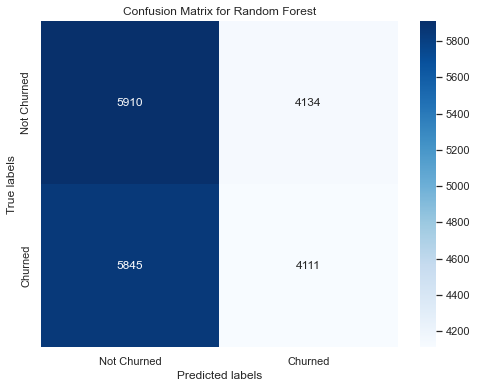

In [44]:
# Predictions
rf_preds = grid_search_rf.predict(X_test)

# Accuracy
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Accuracy: {rf_acc:.4f}")

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_preds)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm, annot=True, fmt='g', cmap="Blues",
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Save And Load the model:

In [47]:
import joblib


In [49]:
# Save
dump(grid_search_rf, 'G:\Machine learning project\customer churn prediction/trained_model.joblib')

# Load
loaded_model = load('G:\Machine learning project\customer churn prediction/trained_model.joblib')
     

# Prediciton Using Pretrained model:

In [52]:
def predict_churn(data):
    prediction = loaded_model.predict(data)
    return "Churned" if prediction[0] == 1 else "Not Churned"

# Create a DataFrame
data = pd.DataFrame([[51, 'Male', 'Miami', 27, 52.0521, 152]], columns=['Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'])

# Use the function to get a human-readable prediction
print(predict_churn(data))
     


Churned
